# 7-Qubit Code: Syndrome Measurement

#### Syndrome desctiptions:

- $S_1$ = $IIIXXXX$
- $S_2$ = $XIXIXIX$
- $S_3$ = $IXXIIXX$
- $S_4$ = $IIIZZZZ$
- $S_5$ = $ZIZIZIZ$
- $S_6$ = $IZZIIZZ$

##### Complete Syndrome Lookup Table

*Here's a reference table for all possible single-qubit Pauli errors in the 7-qubit code:*

- **X Errors:**
$$
\begin{array}{lcr}
\textbf{Qubit} & \textbf{Syndrome}  \\
\hline
q_0 & 000010 \\
q_1 & 000001 \\
q_2 & 000011 \\
q_3 & 000100 \\
q_4 & 000110 \\
q_5 & 000101\\
q_6 & 000111
\end{array}
$$

- **Z Errors:**
$$
\begin{array}{lcr}
\textbf{Qubit} & \textbf{Syndrome}  \\
\hline
q_0 & 010000 \\
q_1 & 001000 \\
q_2 & 011000 \\
q_3 & 100000 \\
q_4 & 110000 \\
q_5 & 101000 \\
q_6 & 111000
\end{array}
$$

- **Y Errors:**
$$
\begin{array}{lcr}
\textbf{Qubit} & \textbf{Syndrome}  \\
\hline
q_0 & 010010 \\
q_1 & 001001 \\
q_2 & 011011 \\
q_3 & 100100 \\
q_4 & 110110 \\
q_5 & 101101 \\
q_6 & 111111
\end{array}
$$

#### Expected Result for a $Z$ error on the first qubit:

The syndrome measurement should yield **010000**, which indicates:
- A **$Z$ error on qubit 0**
- Stabilizer $S_2$ detects the error (bits $c_1$=1)

$$
\begin{array}{lcr}
\textbf{Stabilizer} & \textbf{Op on q0} & \textbf{Z error commutes?} & \textbf{Syndrome bit} \\
\hline
S_1 = IIIXXXX & \textbf{I} & yes (Z \times I) & c_0 = 0 \\
S_2 = XIXIXIX & \textbf{X} & no (Z \times X) & c_1 = 1 \\
S_3 = IXXIIXX & \textbf{I} & yes (Z \times I) & c_2 = 0 \\ 
S_4 = IIIZZZZ & \textbf{I} & yes (Z \times I) & c_3 = 0 \\
S_5 = ZIZIZIZ & \textbf{Z} & yes (Z \times Z) & c_2 = 0 \\ 
S_6 = IZZIIZZ & \textbf{I} & yes (Z \times I) & c_3 = 0
\end{array}
$$

In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def encode_7qubit():
    qc = QuantumCircuit(7, name='7-qubit code')

    qc.cx(0,1)
    qc.cx(0,2)

    qc.h(4)
    qc.h(5)
    qc.h(6)

    qc.cx(6,0)
    qc.cx(6,1)
    qc.cx(5,0)
    qc.cx(6,3)
    qc.cx(5,2)
    qc.cx(4,1)
    qc.cx(5,3)
    qc.cx(4,2)
    qc.cx(4,3)

    return qc.to_gate(label='Encode 7-qubit')

def stabilizer(j):
    stabilizer_qc = QuantumCircuit(7)

    if j == 7:
        stabilizer_qc.x(3)
        stabilizer_qc.x(4)
        stabilizer_qc.x(5)
        stabilizer_qc.x(6)
    elif j == 8:
        stabilizer_qc.x(0)
        stabilizer_qc.x(2)
        stabilizer_qc.x(4)
        stabilizer_qc.x(6)
    elif j == 9:         
        stabilizer_qc.x(1)
        stabilizer_qc.x(2)
        stabilizer_qc.x(5)
        stabilizer_qc.x(6)
    elif j == 10:
        stabilizer_qc.z(3)
        stabilizer_qc.z(4)
        stabilizer_qc.z(5)
        stabilizer_qc.z(6)
    elif j == 11:
        stabilizer_qc.z(0)
        stabilizer_qc.z(2)
        stabilizer_qc.z(4)
        stabilizer_qc.z(6)
    elif j == 12:
        stabilizer_qc.z(1)
        stabilizer_qc.z(2)
        stabilizer_qc.z(5)
        stabilizer_qc.z(6)
      

    
    return stabilizer_qc.to_gate(label='Stabilizer').control(num_ctrl_qubits=1)

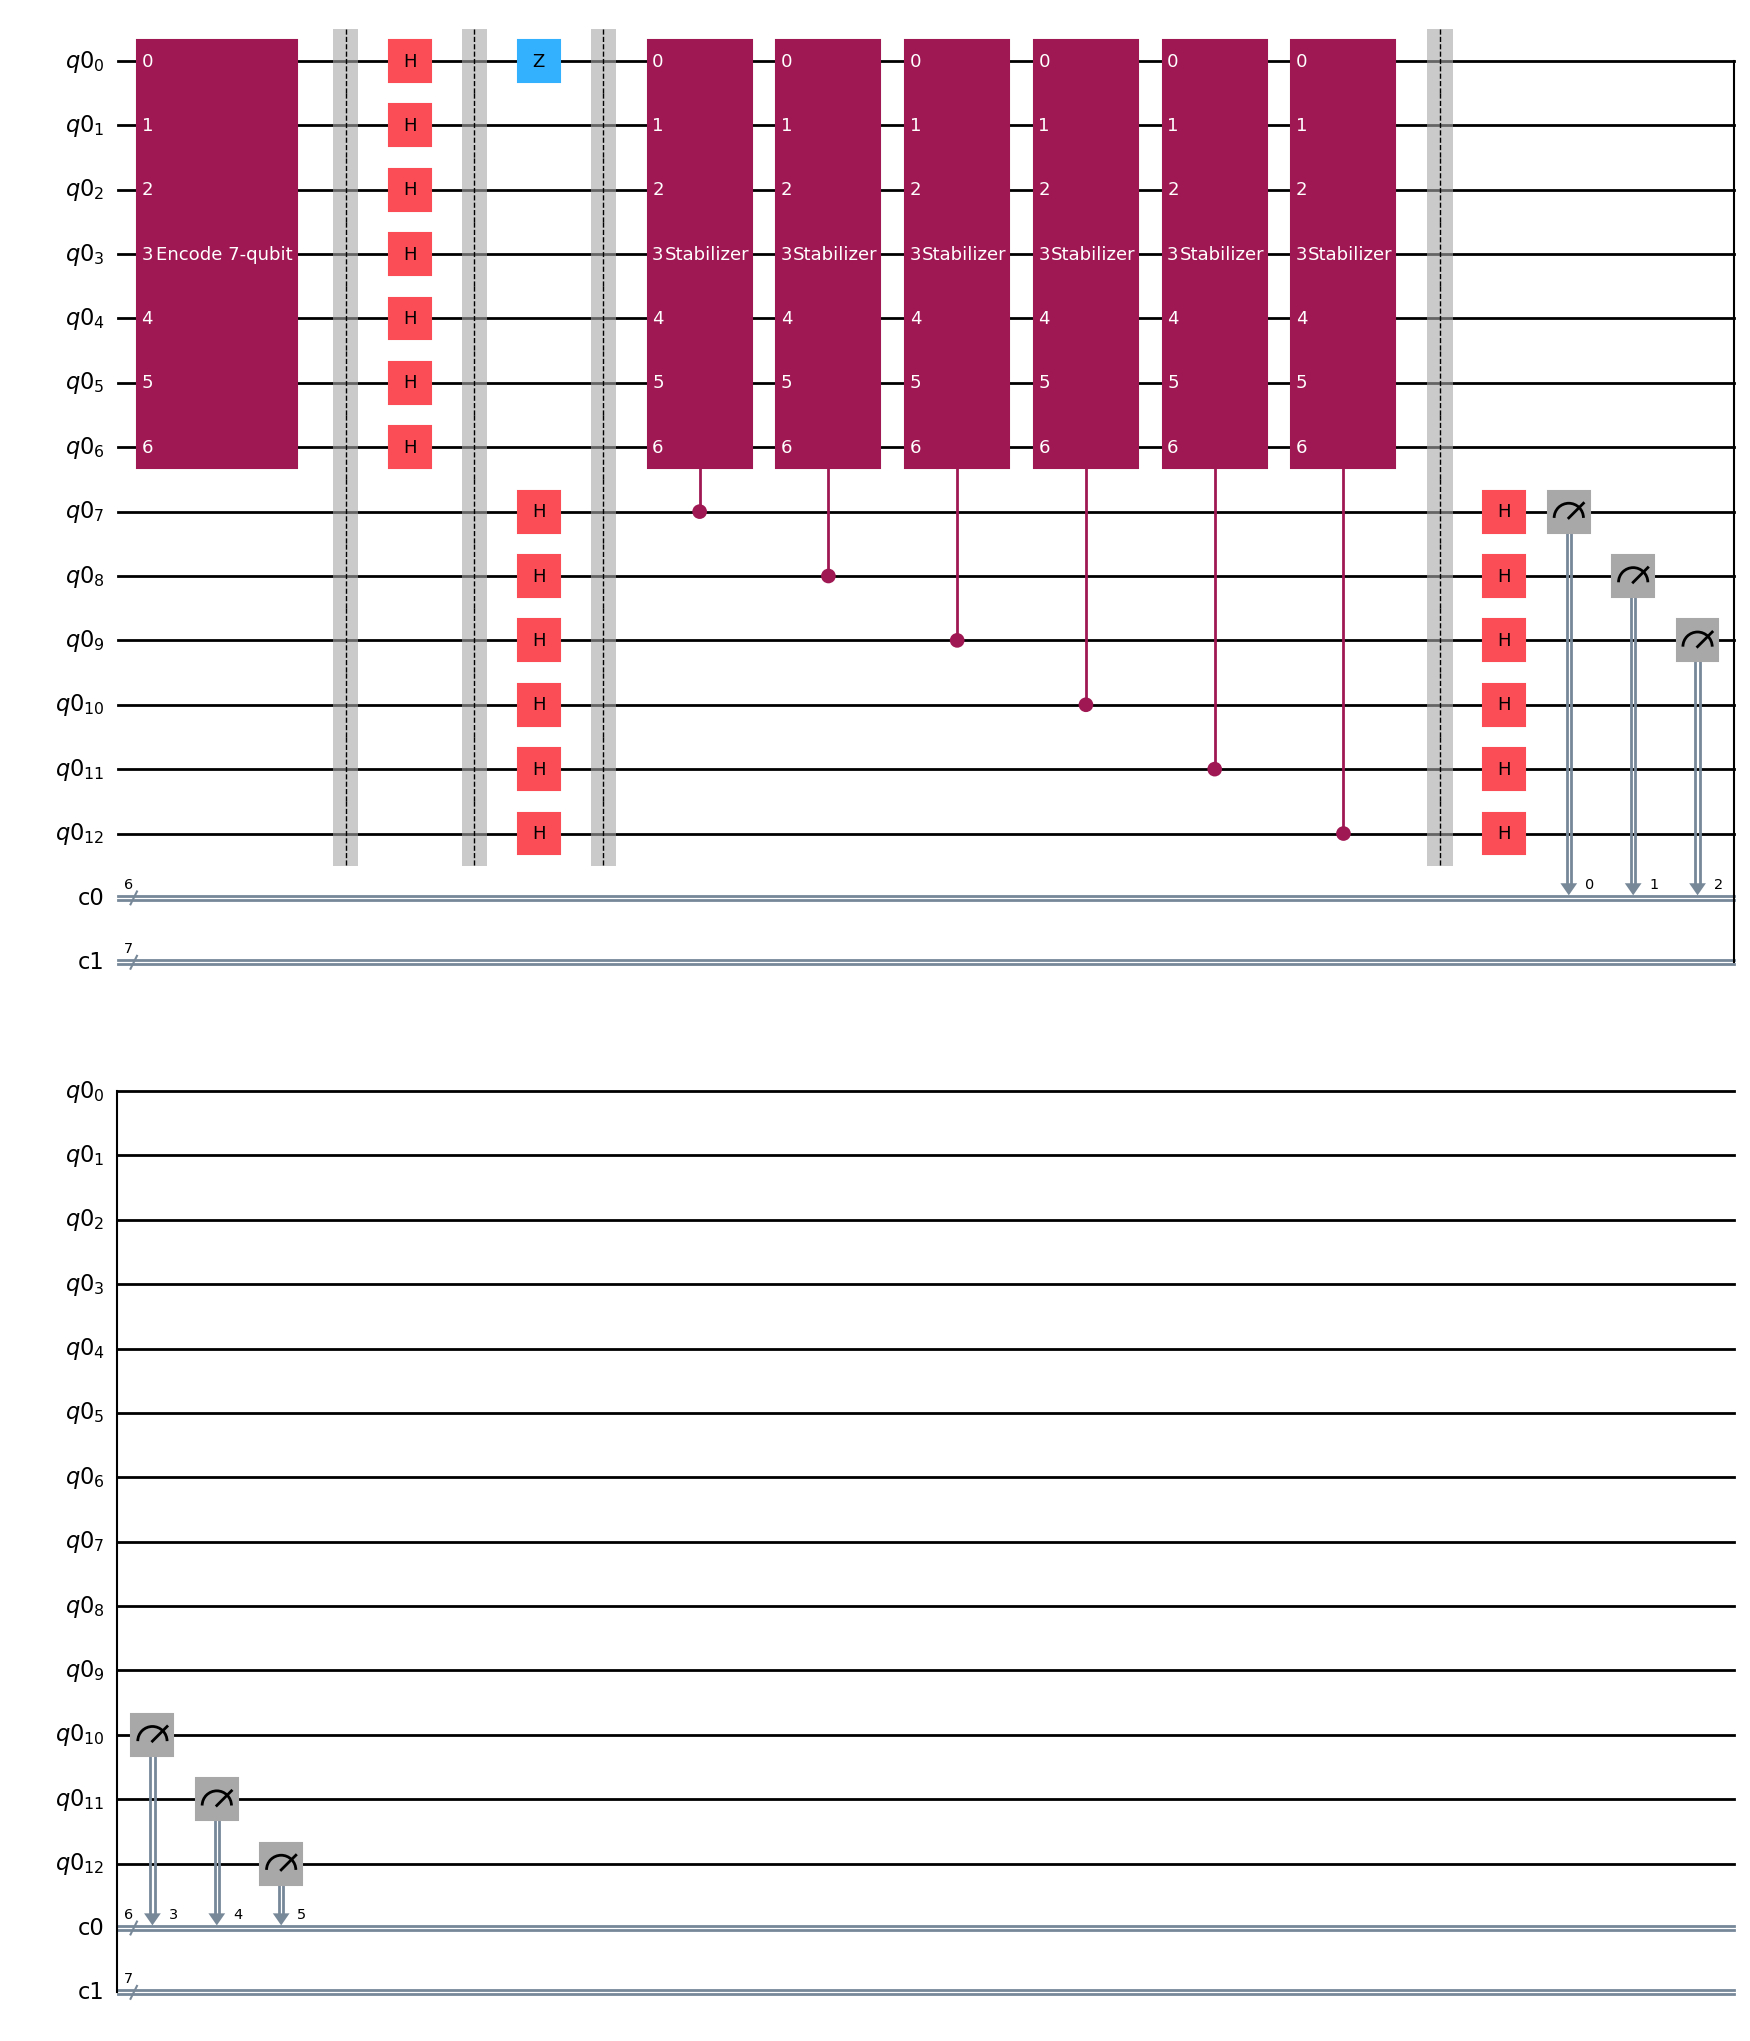

In [3]:
qr1 = QuantumRegister(13)
cr = ClassicalRegister(6)
cr1 = ClassicalRegister(7)
realqc = QuantumCircuit(qr1, cr, cr1)


#realqc.x(0)  to encode 1 state
#realqc.h(0)  to encode + state
realqc.append(encode_7qubit(), range(7))

realqc.barrier()

realqc.h(0)
realqc.h(1)
realqc.h(2)
realqc.h(3)
realqc.h(4)
realqc.h(5)
realqc.h(6)

realqc.barrier()

'''
realqc.s(0)
realqc.s(1)
realqc.s(2)
realqc.s(3)
realqc.s(4)
realqc.s(5)
realqc.s(6)

realqc.barrier()
'''


# introduce an error on qubit 0
realqc.z(0) 

realqc.h(7)
realqc.h(8)
realqc.h(9)
realqc.h(10)
realqc.h(11)
realqc.h(12)


realqc.barrier()

for j in [7,8,9,10,11,12]:
    realqc.append(stabilizer(j), [j] + [0,1,2,3,4,5,6])
   
realqc.barrier()

realqc.h(7)
realqc.h(8)
realqc.h(9)
realqc.h(10)
realqc.h(11)
realqc.h(12)

realqc.measure([7,8,9,10,11,12],[0,1,2,3,4,5])

realqc.draw('mpl')

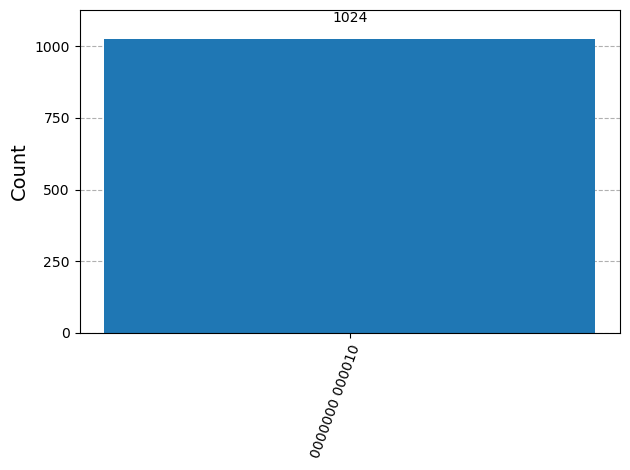

In [4]:
# transpile
sim = AerSimulator()
transpiled_realqc = transpile(realqc, sim)

result = sim.run(transpiled_realqc, shots = 1024).result()
counts = result.get_counts(0)

plot_histogram(counts)

In [5]:
with realqc.if_test((cr, 0b000010)):
    realqc.z(qr1[0])
with realqc.if_test((cr, 0b000100)):
    realqc.z(qr1[1])
with realqc.if_test((cr, 0b000110)):
    realqc.z(qr1[2])
with realqc.if_test((cr, 0b000001)):
    realqc.z(qr1[3])
with realqc.if_test((cr, 0b000011)):
    realqc.z(qr1[4])
with realqc.if_test((cr, 0b000101)):
    realqc.z(qr1[5])
with realqc.if_test((cr, 0b000111)):
    realqc.z(qr1[6])

realqc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=13, num_clbits=0, params=[]), qubits=(<Qubit register=(13, "q0"), index=0>, <Qubit register=(13, "q0"), index=1>, <Qubit register=(13, "q0"), index=2>, <Qubit register=(13, "q0"), index=3>, <Qubit register=(13, "q0"), index=4>, <Qubit register=(13, "q0"), index=5>, <Qubit register=(13, "q0"), index=6>, <Qubit register=(13, "q0"), index=7>, <Qubit register=(13, "q0"), index=8>, <Qubit register=(13, "q0"), index=9>, <Qubit register=(13, "q0"), index=10>, <Qubit register=(13, "q0"), index=11>, <Qubit register=(13, "q0"), index=12>), clbits=())

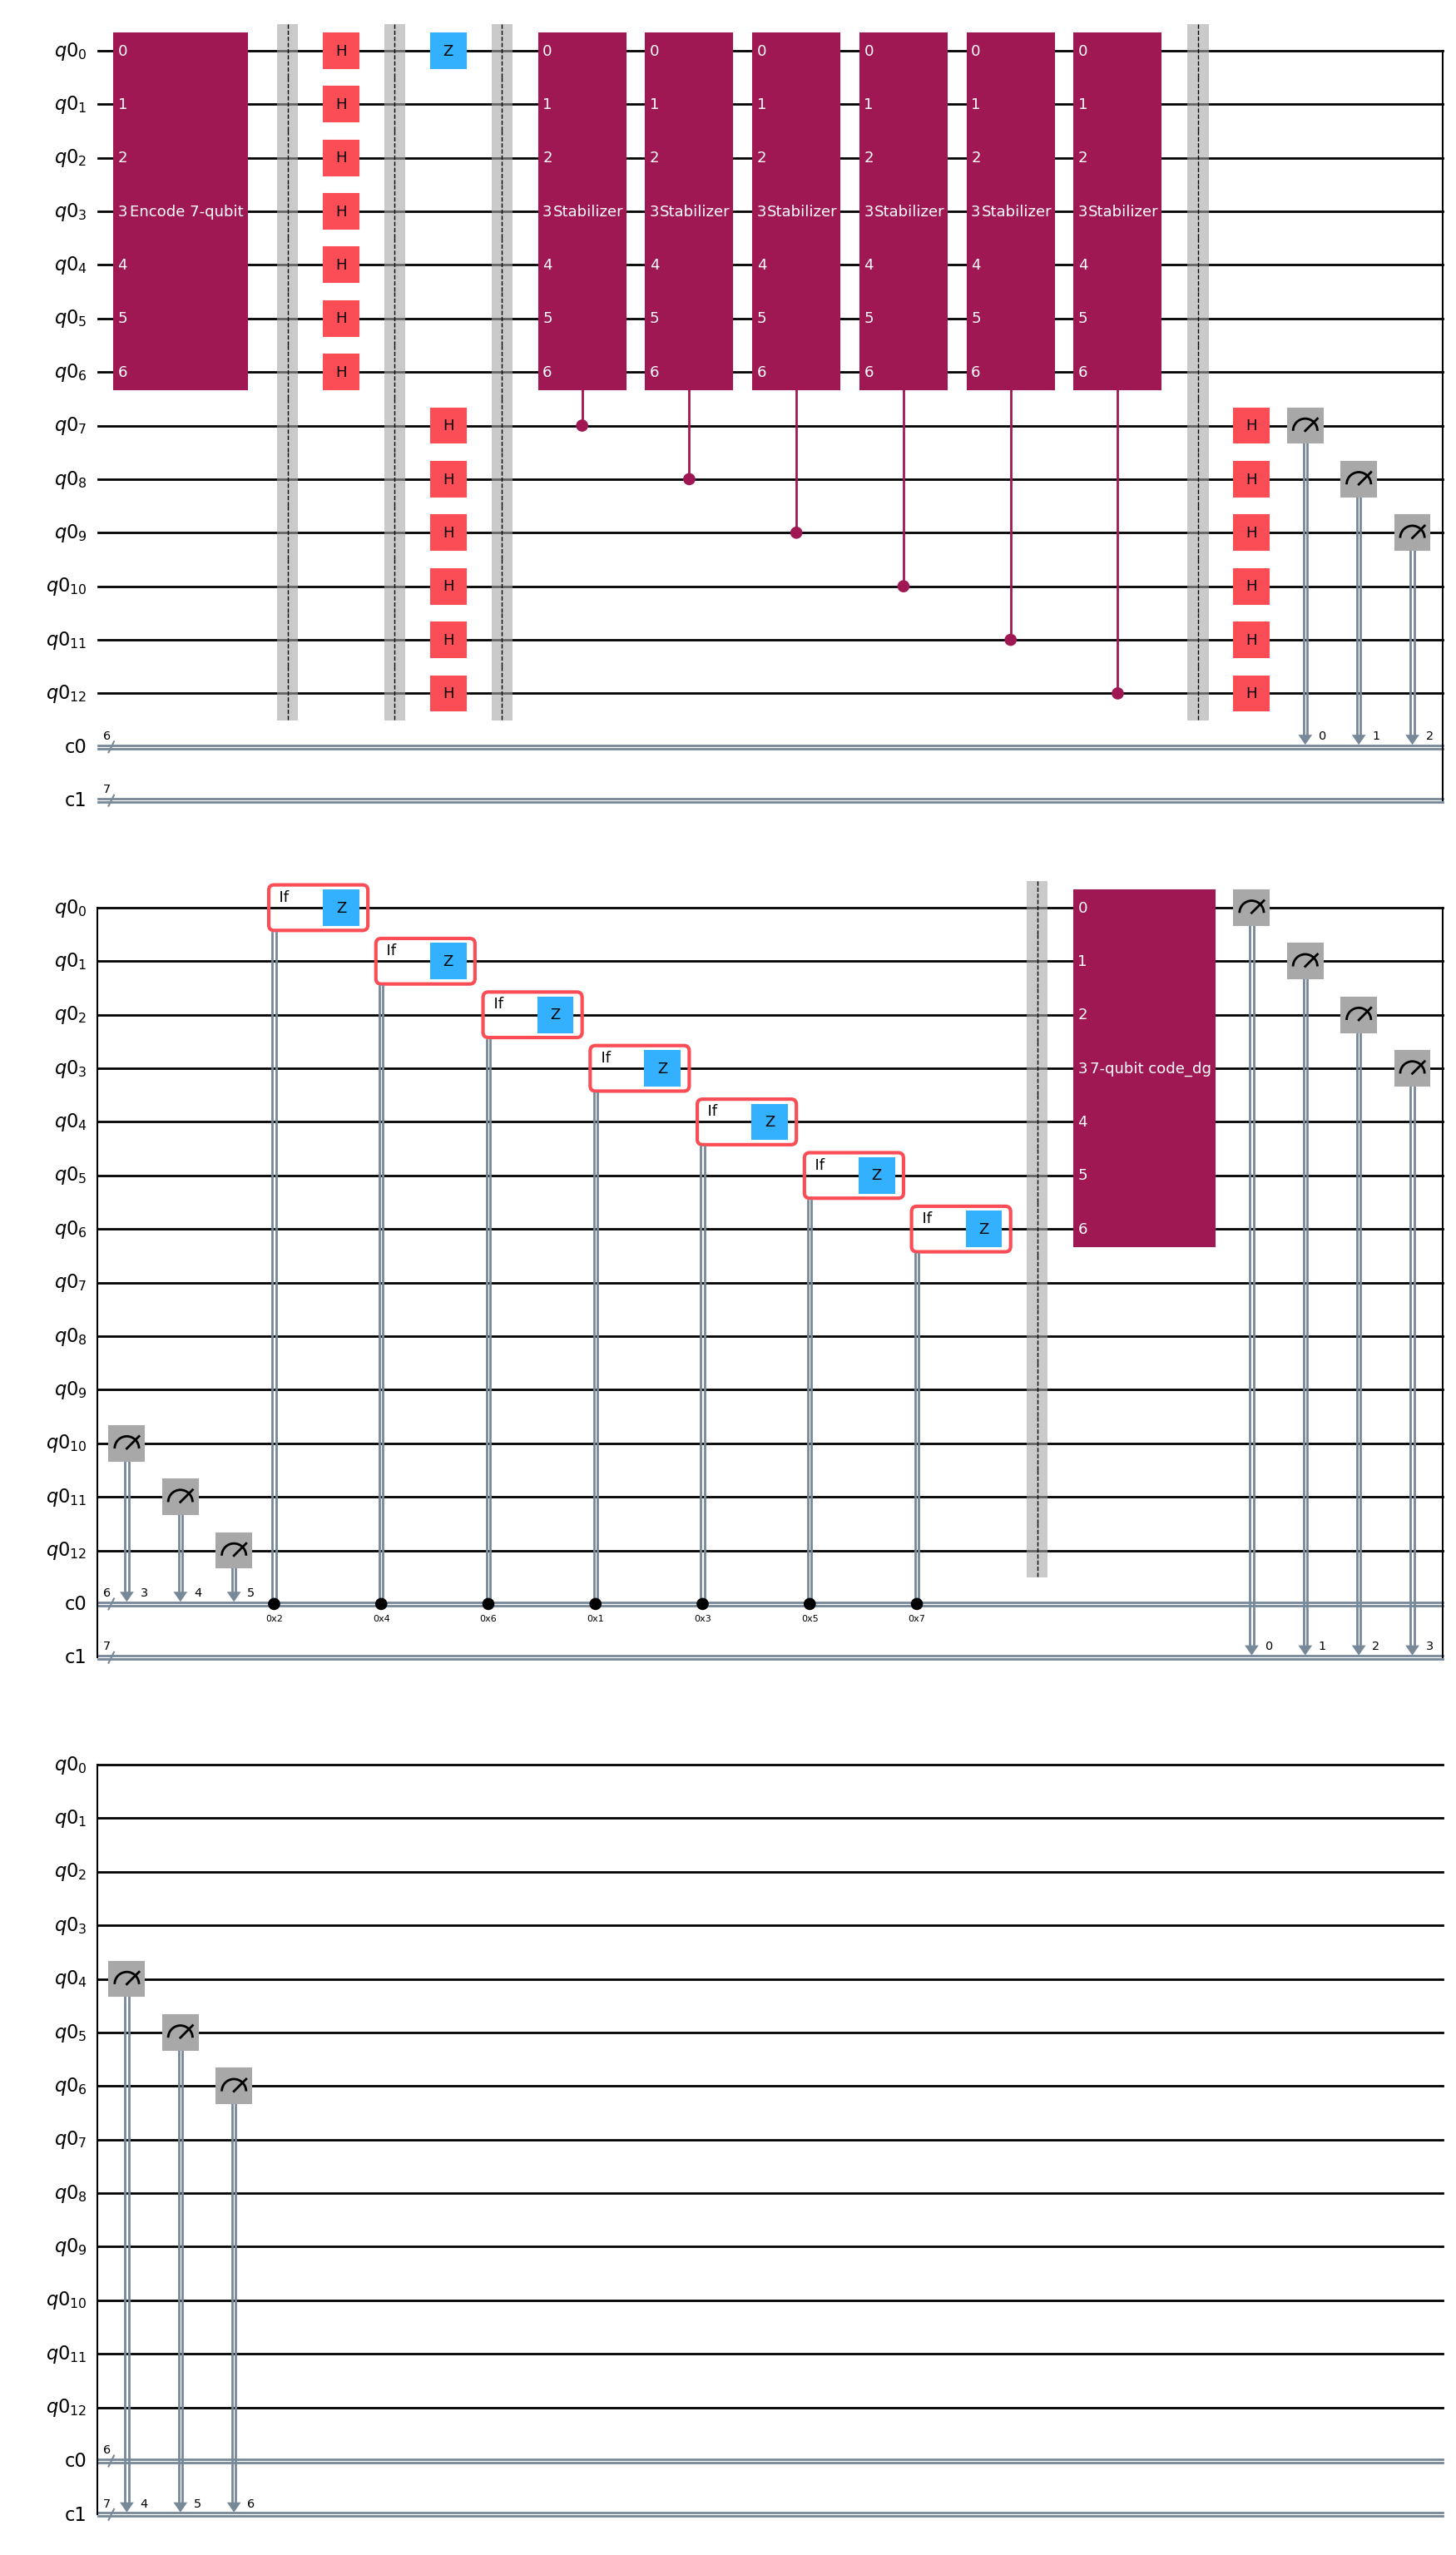

In [6]:
realqc.append(encode_7qubit().inverse(), range(7))
    
realqc.measure([qr1[0],qr1[1],qr1[2],qr1[3],qr1[4], qr1[5], qr1[6]],[cr1[0],cr1[1],cr1[2],cr1[3],cr1[4],cr1[5],cr1[6]])
realqc.draw('mpl')

{'0000000 000010': 491, '0000001 000010': 533}


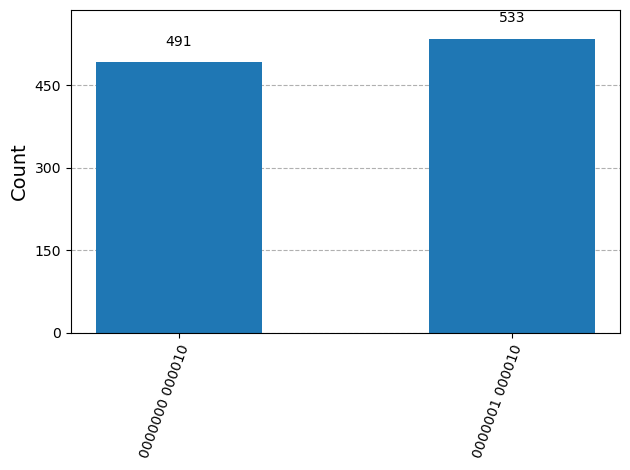

In [7]:
sim = AerSimulator()
transpiled= transpile(realqc, sim)
result = sim.run(transpiled, shots=1024).result()
print(result.get_counts())
plot_histogram(result.get_counts())